In [1]:
import gym
from gym.core import Wrapper
from gym.envs.atari.atari_env import AtariEnv
from collections import namedtuple
import math
import time
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class withSnapshot(Wrapper):
    
    def getSnapshot(self):
        return self.clone_full_state()
    
    def loadSnapshot(self,snapshot):
        self.restore_full_state(snapshot)

In [3]:
class Node:
    
    def __init__(self,parent,action):
        self.n=0
        self.t=0
        self.parent=parent
        self.children=[]
        self.action=action
        
        # modified for root node
        if action!=None:
            env.loadSnapshot(self.parent.snapshot)
            env.step(action)
            self.snapshot=env.getSnapshot()
            
        else:
            env.reset()
            env.seed(0)
            self.snapshot=env.getSnapshot()
    
    def ucb(self):
        if self.n==0:
            return 10086
        else:
            scalar=1/math.sqrt(2)
            return self.t/self.n+2*scalar*math.sqrt(self.parent.n/self.n)
            
    def is_leaf(self):
        return len(self.children)==0
    
    def select_best_leaf(self):
        if self.is_leaf():
            return self
        
        ucbVal=[]
        for i in self.children:
            ucbVal.append(i.ucb())
            
        best_leaf=self.children[ucbVal.index(max(ucbVal))]
        return best_leaf.select_best_leaf()
    
    def expand(self):
        action_space=4
        
        for i in range(action_space):
            self.children.append(Node(self,i))
            
        return self.select_best_leaf()
    
    def propagate(self,value):
        self.t+=value
        self.n+=1
        
        if self.parent!=None:
            return self.parent.propagate(value)
        
    def is_done(self):
        env.loadSnapshot(self.parent.snapshot)
        _,_,done,_=env.step(self.action)
        return done
        

In [4]:
def rollout(node):
    
    env.loadSnapshot(node.snapshot)
    
    rollout_done=False
    endReward=0
    last=0   
    
    while True:
        action = env.action_space.sample()
        _, immediate_reward, rollout_done, _ = env.step(action)
        endReward += immediate_reward
        last += 1
        if rollout_done:
            break
            
#     print("rollout:",last)

    node.propagate(endReward)
    return endReward
        

In [5]:
def MCTS(node):
    #node is the current root
    
    for i in range(15):

        if node.is_leaf():  # specific for root node
            node.expand()

        else:
            
            leaf=node.select_best_leaf() # then leaf and select_return have same id
            
            if leaf.n==0:
                reward=rollout(leaf)
                
            elif leaf.n>0 and leaf.children==[]:
                new_leaf=leaf.expand()
                reward=rollout(new_leaf)

    val=[]
    for i in node.children:
        val.append(i.t)
            
            
    ###########Monitor###########
    print(val)
    
    return node.children[val.index(max(val))],node.children[val.index(max(val))].action

In [6]:
env=withSnapshot(gym.make("BreakoutDeterministic-v4").env)
test=Node(None,None)

In [7]:
done = False
acList=[]
for i in range(10000):


    start=time.perf_counter()
    
    new_root,action=MCTS(test)
    env.loadSnapshot(test.snapshot)
    _,reward,done,_=env.step(action)
    acList.append(action)
    test.snapshot=env.getSnapshot()
    test=new_root
    
    end=time.perf_counter()
    
    print("Is done?{}  one step with action:{} reward:{} time_used:{}".format(done,action,reward,end-start))
    if done:
        break
    

[3.0, 11.0, 2.0, 1.0]
Is done?False  one step with action:1 reward:0.0 time_used:1.1805426620412618
[5.0, 10.0, 8.0, 4.0]
Is done?False  one step with action:1 reward:0.0 time_used:1.2862214529886842
[10.0, 2.0, 9.0, 6.0]
Is done?False  one step with action:0 reward:0.0 time_used:1.2595990819390863
[6.0, 5.0, 5.0, 3.0]
Is done?False  one step with action:0 reward:0.0 time_used:1.104596272110939
[3.0, 4.0, 3.0, 3.0]
Is done?False  one step with action:1 reward:0.0 time_used:1.0398185970261693
[2.0, 7.0, 0.0, 8.0]
Is done?False  one step with action:3 reward:0.0 time_used:1.1769537450745702
[8.0, 1.0, 11.0, 6.0]
Is done?False  one step with action:2 reward:0.0 time_used:1.1888030290137976
[13.0, 2.0, 3.0, 6.0]
Is done?False  one step with action:0 reward:0.0 time_used:1.1801912439987063
[9.0, 2.0, 8.0, 5.0]
Is done?False  one step with action:0 reward:0.0 time_used:1.0920985399279743
[2.0, 6.0, 9.0, 6.0]
Is done?False  one step with action:2 reward:0.0 time_used:1.1788474800996482
[3.0, 

In [8]:
print(acList)

[1, 1, 0, 0, 1, 3, 2, 0, 0, 2, 1, 3, 2, 3, 2, 1, 0, 1, 0, 2, 3, 3, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 3, 0, 0, 2, 1, 0, 0, 0, 3, 1, 3, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 3, 2, 1, 0, 0, 0, 2, 3, 1, 2, 1, 1, 2, 3, 1, 1, 3, 0, 2, 3, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 1, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 1, 3, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 3, 1, 0, 2, 1, 3, 1, 0, 0, 3, 2, 0, 0, 3, 1, 2, 0, 1, 3, 0, 3, 0, 2, 3, 3, 2, 2, 0, 1, 0, 2, 3, 2, 2, 2, 1, 3, 1, 1, 1, 2, 0, 1, 2, 0, 1, 3, 0, 3, 0, 2, 0, 0, 0, 1, 3, 0, 0, 0, 2, 3, 1, 3, 2, 0, 0, 3, 0, 3, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 3, 1, 0, 3, 1, 2, 0, 3, 0, 3, 1, 0, 3, 0, 1, 3, 2, 0, 3, 0, 2, 3, 1, 3, 2, 2, 0, 2, 1, 3, 1, 1, 3, 3, 0, 0, 0, 2, 1, 2, 3, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 3, 0, 3, 3, 2, 2, 0, 2, 0, 1, 0, 1, 1, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 0, 3, 1, 0, 0, 2, 0, 1, 1, 3, 1, 2, 0, 0, 2, 2, 1, 0, 2, 0, 3, 0, 0, 2, 1, 3, 1, 1, 3, 0, 1, 3, 1, 2, 0, 

670


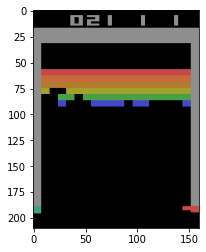

In [9]:
env=withSnapshot(gym.make("BreakoutDeterministic-v4").env)
env.reset()
env.seed(0)

img = plt.imshow(env.render(mode='rgb_array')) # only call this once

for i in acList:
    _,_,done,_=env.step(i)
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    if done:
        break
print(len(acList))